In [1]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree.

In [2]:
from src import LTVSyntheticData
from src import LTVexploratory

### Generate synthetic data 

In [3]:
synth_data_gen = LTVSyntheticData(is_subscr=False)
customer_table = synth_data_gen.get_customers_table()
event_table = synth_data_gen.get_purchases()

customer_table = customer_table.rename(columns={'timestamp': 'timestamp_registration'})
event_table = event_table.rename(columns={'timestamp': 'timestamp_event'})

# Call the exploratory class
da = LTVexploratory(customer_table, event_table)

/Users/raphaeltamaki/Documents/git/LTVision/src/synth_data.py:342: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  purchases = pd.concat([purchases, high_payers_payments, mid_payers_payments, low_payers_payments], ignore_index=True)


,table,number_uuid,share_uuid
0,customers only,8002,80.02%
1,event only,0,0.00%
2,customers & event,1998,19.98%


We are going to delete 0.00% UUID from df table because of negative value between first purchase date and registration


### Run analysis

<Axes: >

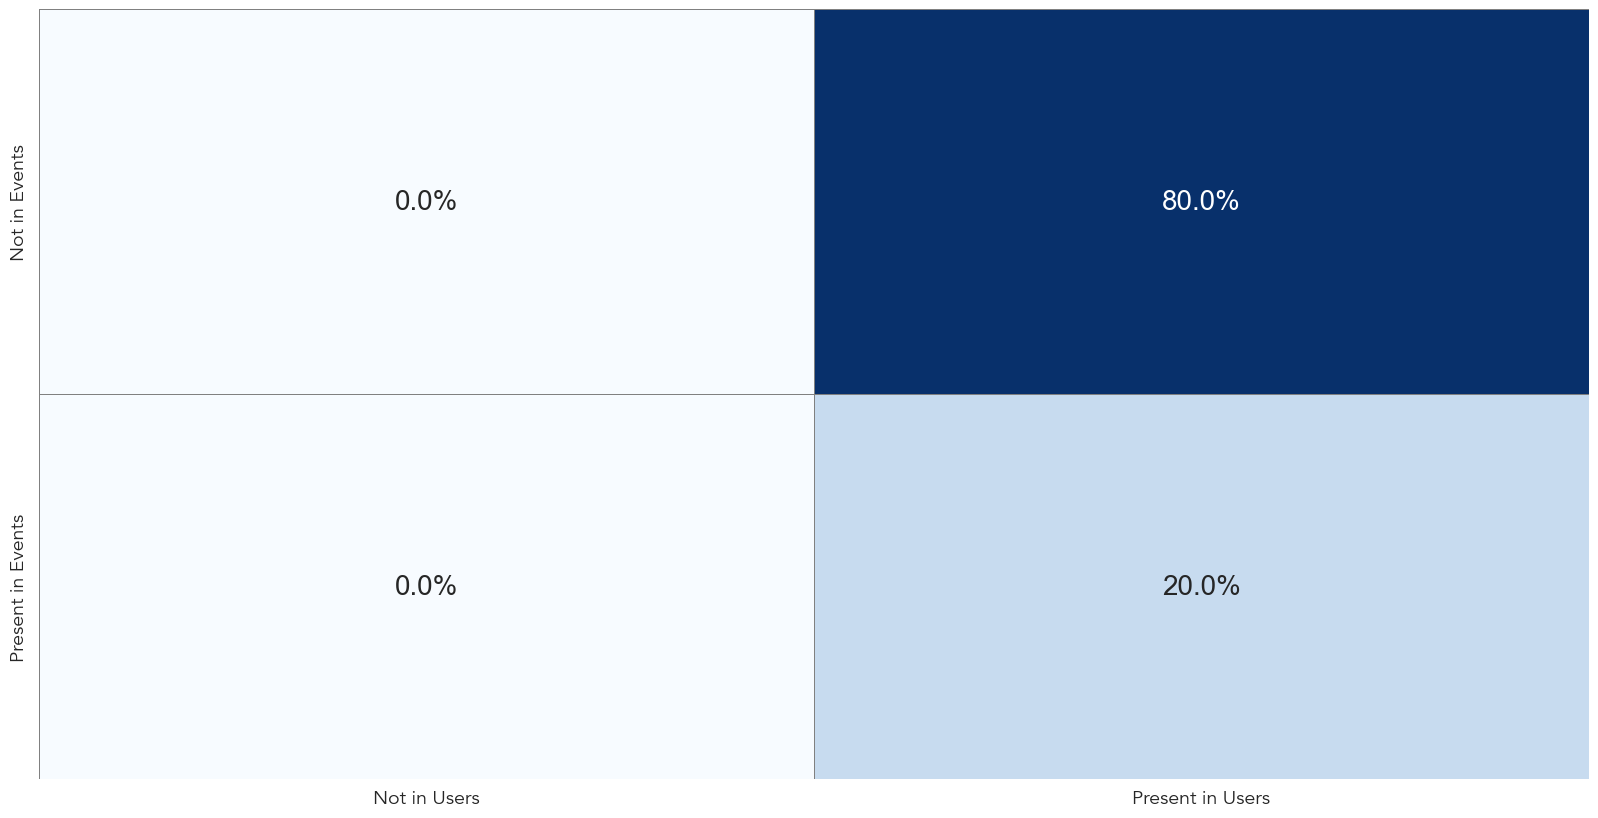

In [8]:
da.plot_customers_intersection()

/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_xticklabels(
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_yticklabels(


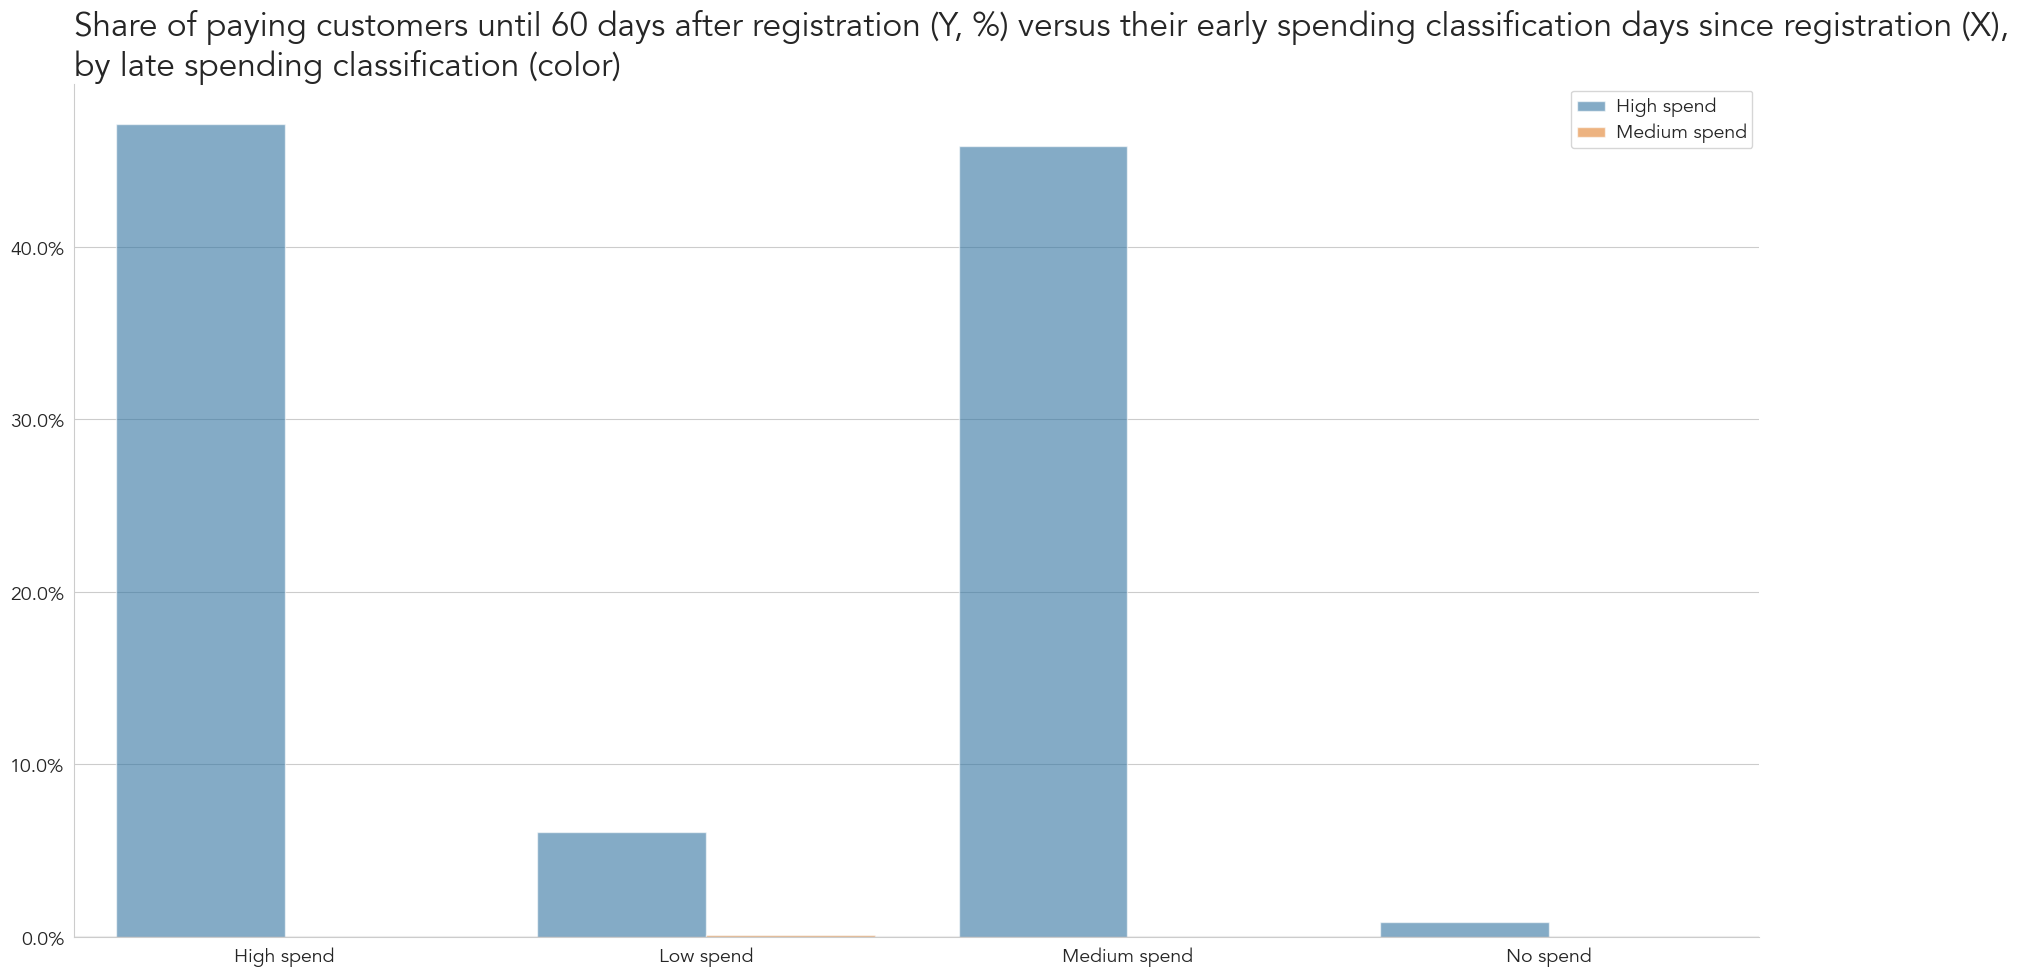

In [9]:
da.plot_paying_customers_flow(days_limit=60, early_limit=7, spending_breaks={'No spend': 0, 'Low spend': 10, 'Medium spend': 100, 'High spend': 99999})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_xticklabels(
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_yticklabels(


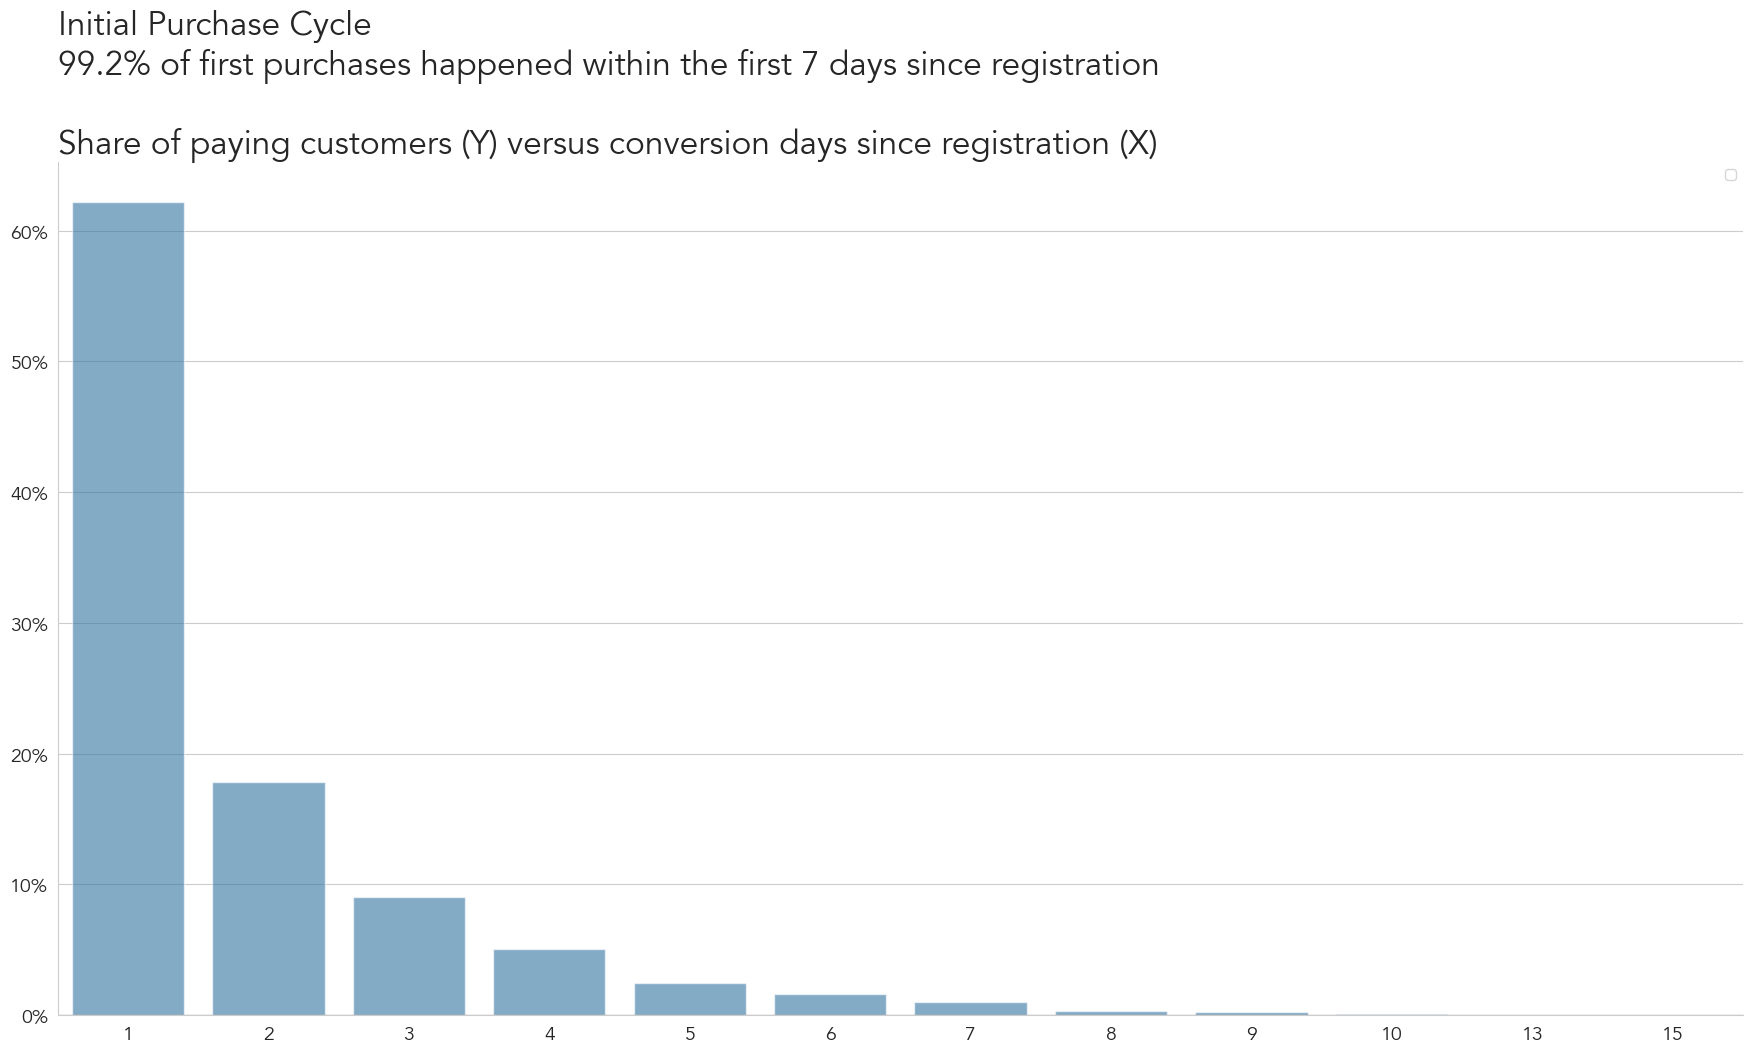

In [10]:
da.plot_customers_histogram_per_conversion_day(days_limit=60)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_xticklabels(
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_yticklabels(


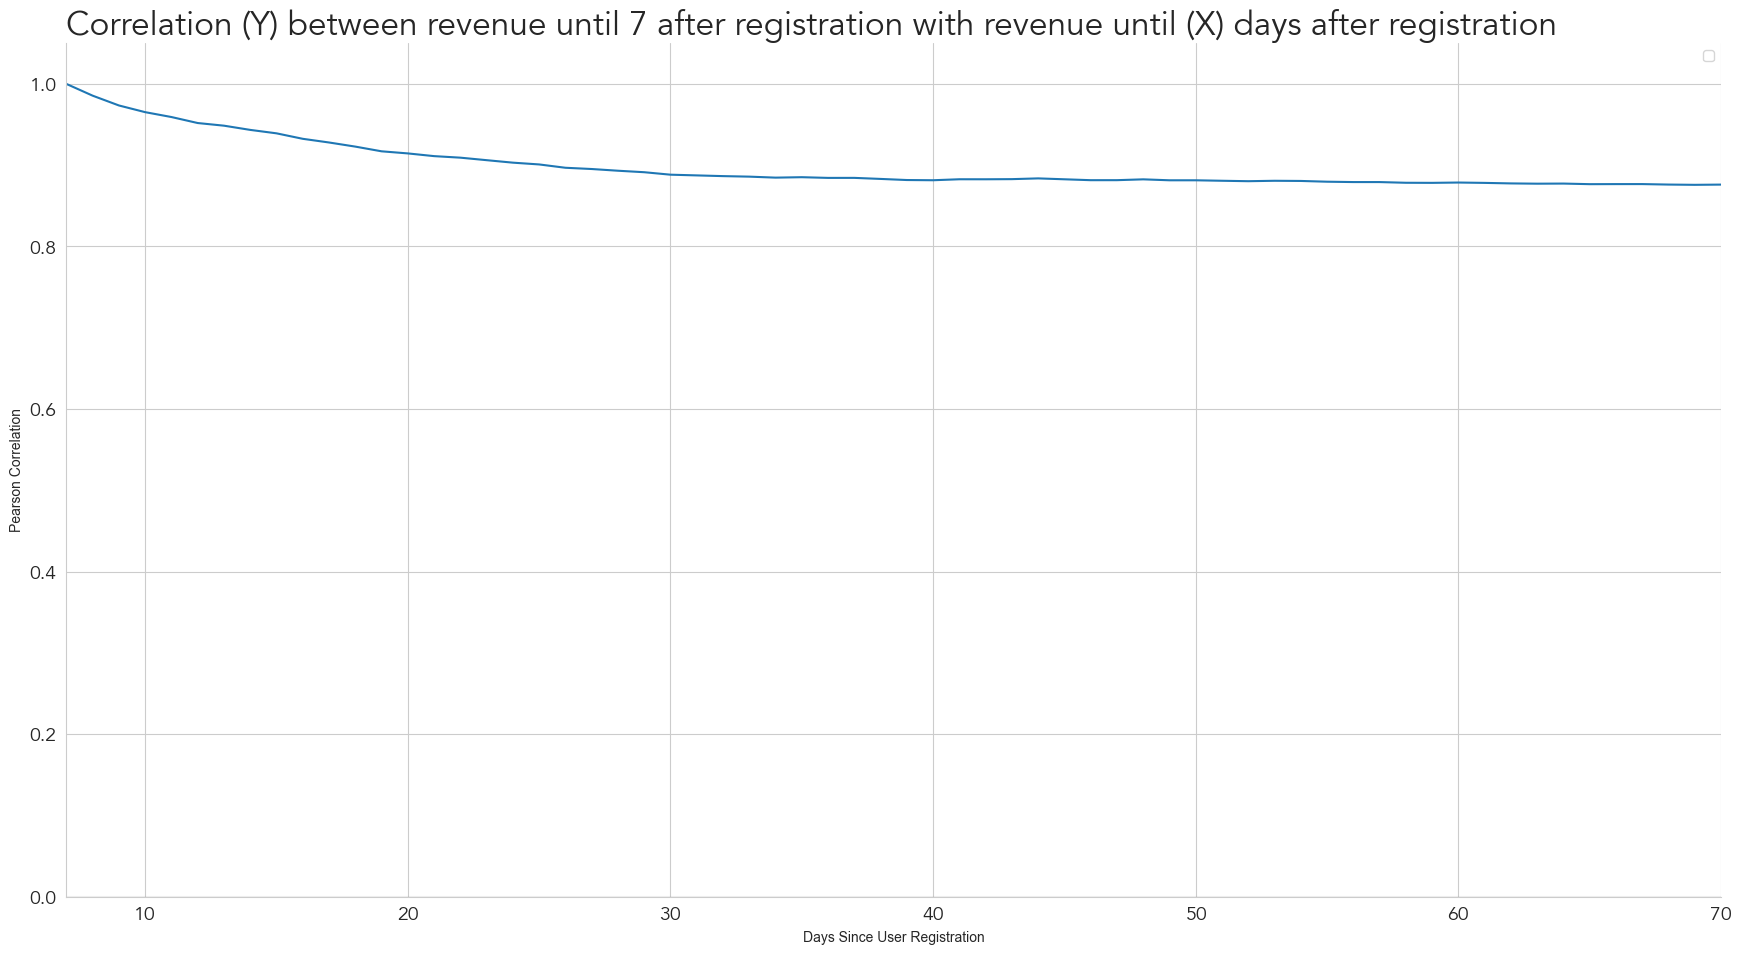

In [7]:
da.plot_early_late_revenue_correlation(days_limit=70)
